In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import statistics
import re

In [2]:
%cd /home/miri-o/Documents/
import biovec
CDR3_cropped_model = biovec.models.load_protvec('CDR3_cropped_model')

/home/miri-o/Documents


In [3]:
infile = pd.read_csv('CDR3_properties_HCV.csv')
infile.head()

Unnamed: 0  X  Unnamed..0  index  Unnamed..0.1        SEQUENCE_ID  \
0           1  0           0      0             0  AACTGTAAGATACACTA   
1           2  1           1      1             1  CTTATAGTCATTAAATA   
2           3  3           3      3             3  TGCCTTGGCCCTTATTT   
3           4  4           4      5             5  GATATTCGATATATAAT   
4           5  5           5      6             6  CTAATAAATCGTTATTA   

                                      SEQUENCE_INPUT  FUNCTIONAL  IN_FRAME  \
0  GCTTTCTGAGAGTCATGGATCTCATGTGCAAGAAAATGAAGCACCT...        True      True   
1  AGCTCTGGGAGAGGAGCCCAGCACTAGAAGTCGGCGGTGTTTCCAT...        True      True   
2  GAGATCTCAGAGAGGAGCCTTAGCCCTGGACTCCAAGGCCTTTCCA...        True      True   
3  AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCAT...        True      True   
4  GAGCTCTCAGAGAGGTGCCTTAGCCCTGGATTCCAAGGCATTTCCA...        True      True   

    STOP        ...                       VJL  CDR3_AA_LENGTH CDR3_AA_GRAVY  \
0  False        ...         IGHV4-39*IGHJ4*39              11     -0.554545   
1  False        ...         IGHV3-30*IGHJ4*48              14     -1.771429   
2  False        ...         IGHV3-11*IGHJ2*36              10     -0.680000   
3  False        ...         IGHV3-23*IGHJ4*57              17     -0.764706   
4  False        ...         IGHV3-48*IGHJ4*54              16     -0.868750   

  CDR3_AA_BULK CDR3_AA_ALIPHATIC CDR3_AA_POLARITY CDR3_AA_CHARGE  \
0    13.468182          0.445455         8.163636      -0.077262   
1    10.337143          0.071429        10.078571      -2.888734   
2    15.822000          0.490000         8.520000      -0.001375   
3    13.157059          0.458824         8.676471      -0.005748   
4    14.255625          0.368750         8.506250       0.993936   

   CDR3_AA_BASIC  CDR3_AA_ACIDIC  CDR3_AA_AROMATIC  
0       0.090909        0.090909          0.181818  
1       0.142857        0.285714          0.142857  
2       0.200000        0.200000          0.300000  
3       0.117647        0.117647          0.235294  
4       0.125000        0.062500          0.250000  

[5 rows x 57 columns]

In [4]:
infile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313273 entries, 0 to 1313272
Data columns (total 57 columns):
Unnamed: 0            1313273 non-null int64
X                     1313273 non-null int64
Unnamed..0            1313273 non-null int64
index                 1313273 non-null int64
Unnamed..0.1          1313273 non-null int64
SEQUENCE_ID           1313273 non-null object
SEQUENCE_INPUT        1313273 non-null object
FUNCTIONAL            1313273 non-null bool
IN_FRAME              1313273 non-null bool
STOP                  1313273 non-null bool
MUTATED_INVARIANT     1313273 non-null object
INDELS                1313273 non-null bool
V_CALL                1313273 non-null object
D_CALL                1313273 non-null object
J_CALL                1313273 non-null object
SEQUENCE_VDJ          1313273 non-null object
SEQUENCE_IMGT         1313273 non-null object
V_SEQ_START           1313273 non-null int64
V_SEQ_LENGTH          1313273 non-null int64
V_GERM_START_VDJ      131327

In [7]:
infile['CONDITION'] = [re.split('\d', condition)[0] for condition in infile['SUBJECT']]
conditions = infile['CONDITION'].unique()

In [9]:
import random
n = 50000
np.random.seed(1)
random_indexes = {}
random_indexes = random_indexes.fromkeys(conditions,0)
for condition in conditions:
    indexes = np.where(infile['CONDITION']==condition)[0]
    random_indexes[condition] = np.random.choice(indexes,n)
    


In [22]:
import random
n = 50000
np.random.seed(1)
random_indexes = np.random.choice(len(infile['CONDITION']),n)

array([ 128037,  491755,  470924, ...,  119152,  722271, 1157139])

In [89]:
# Make a new data frame with the smapled data
subdata = {'Original_index':random_indexes, 
           'JUNC_AA' : infile['JUNC_AA'][random_indexes], 
           'CONDITION': infile['CONDITION'][random_indexes],
          'SUBJECT':infile['SUBJECT'][random_indexes]}

In [64]:
CDR3_cropped_model.to_vecs(infile['JUNC_AA'][subdata['Original_index'][1]])

[array([ 0.50752091,  0.64674866,  0.44888285,  1.45604622, -0.17590022,
         0.51012951, -0.53804266, -1.44894385,  0.3643876 ,  0.258423  ,
         0.76358068,  0.30999178, -1.28575563,  0.72962695,  0.00516668,
         0.58564335, -0.56845236, -1.34380734,  0.59360206,  0.31971878,
        -0.62768394,  0.63254446, -0.14529356, -1.12699521,  0.22604555,
         0.49093732,  0.32537726,  0.02964646, -0.49636519,  1.11535621,
         0.45614797, -0.97489756, -0.81987083, -0.18207094,  0.29862362,
         0.84307569,  0.01021965, -0.14530945,  0.23611532,  0.62203336,
        -0.80332398,  0.13503221, -1.09514749,  0.92964911,  0.11933191,
        -0.3217299 ,  0.54444695, -0.10891665, -0.46364981,  0.36297476,
        -0.26650572,  1.27855158,  0.53545892, -0.26654679,  0.01389432,
        -1.10692275,  1.8790561 , -0.37608579, -0.51160342, -0.05072527,
         0.52954847, -0.4095903 ,  0.59830582, -1.39386857,  0.09329387,
        -0.96265697,  0.7421838 ,  1.37087321,  0.2

In [66]:
randvectors_word2vec = np.zeros((n,100))

index = 0
for i in range(n) :
    word = subdata['JUNC_AA'].iloc[i]
    try:
        randvectors_word2vec[i] = list(CDR3_cropped_model.to_vecs(word)[0])
    except:
        subdata['Original_index'][i] = np.random.choice(len(infile['CONDITION']))
        subdata['JUNC_AA'].iloc[i]  = infile['JUNC_AA'][subdata['Original_index'][i]]
        subdata['CONDITION'].iloc[i] = infile['CONDITION'][subdata['Original_index'][i]]
        word = subdata['JUNC_AA'].iloc[i]
        randvectors_word2vec[i] = list(CDR3_cropped_model.to_vecs(word)[0])

#randvectors_word2vec[0]
vec_embedded = TSNE(n_components=2, init = 'pca', random_state =0).fit_transform(randvectors_word2vec)


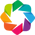

In [69]:
import holoviews as hv
hv.extension('bokeh')

In [90]:
subdata['dim1'] = vec_embedded[:,0]
subdata['dim2'] = vec_embedded[:,1]


In [91]:
pd.DataFrame(subdata).to_csv('TSNE_results_50k.csv', index=False)

In [85]:
scatter = hv.Scatter(subdata, 'dim1', 'dim2')
scatter

:Scatter   [dim1]   (dim2)

In [74]:
points = hv.Points((vec_info['dim1'], vec_info['dim2']))
import datashader as ds
from holoviews.operation.datashader import aggregate, shade, datashade, dynspread
from holoviews.operation import decimate
datashade(points) + dynspread(datashade(points))

:Layout
   .DynamicMap.I  :DynamicMap   []
   .DynamicMap.II :DynamicMap   []

In [78]:

from bokeh.io import output_file, output_notebook, show
from bokeh.models import HoverTool
from bokeh.plotting import figure

p = figure(title="Hexbin for 50k points", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154')
p.grid.visible = False

r, bins = p.hexbin(vec_info['dim1'], vec_info['dim2'], size=0.5, hover_color="pink", hover_alpha=0.8)

p.circle(vec_info['dim1'], vec_info['dim2'], color="white", size=1)

hover = HoverTool(tooltips=[("count", "@c"), ("(q,r)", "(@q, @r)")],
                  mode="mouse", point_policy="follow_mouse", renderers=[r])

p.add_tools(hover)



show(p)


AttributeError: 'Figure' object has no attribute 'hexbin'

In [88]:
import bokeh
bokeh.__version__

'0.12.14'

In [49]:
i=0
word = subdata['JUNC_AA]'.iloc[i]

SyntaxError: unexpected EOF while parsing (<ipython-input-49-00c440c215b9>, line 2)

In [ ]:
randvectors_word2vec = np.zeros((n*3,100))

index = 0
for condition in random_indexes.keys():
    for i in random_indexes[condition] :
        word = infile.loc[i, ('JUNC_AA')]
        randvectors_word2vec[index] = list(CDR3_cropped_model.to_vecs(word)[0])
        index+=1


#randvectors_word2vec[0]
vec_embedded = TSNE(n_components=2, init = 'pca', random_state =0).fit_transform(randvectors_word2vec)